# ARMA

$$
X_t=\text{Noise+Autoregressive Part+Moving Average Part} \\
X_t = Z_t + \phi_1X_{t-1}+\dots+\phi_pX_{t-p}+\Theta_1 Z_{t-1} + \dots + \Theta_p Z_{t-p} \\
\Theta(B)Z_t = \Phi(B)X_t \\
\pi(B) = \frac{\Theta(B)}{\Phi(B)} \\
X_t = \frac{\Theta(B)}{\Phi(B)} Z_t = \pi(B) Z_t
$$

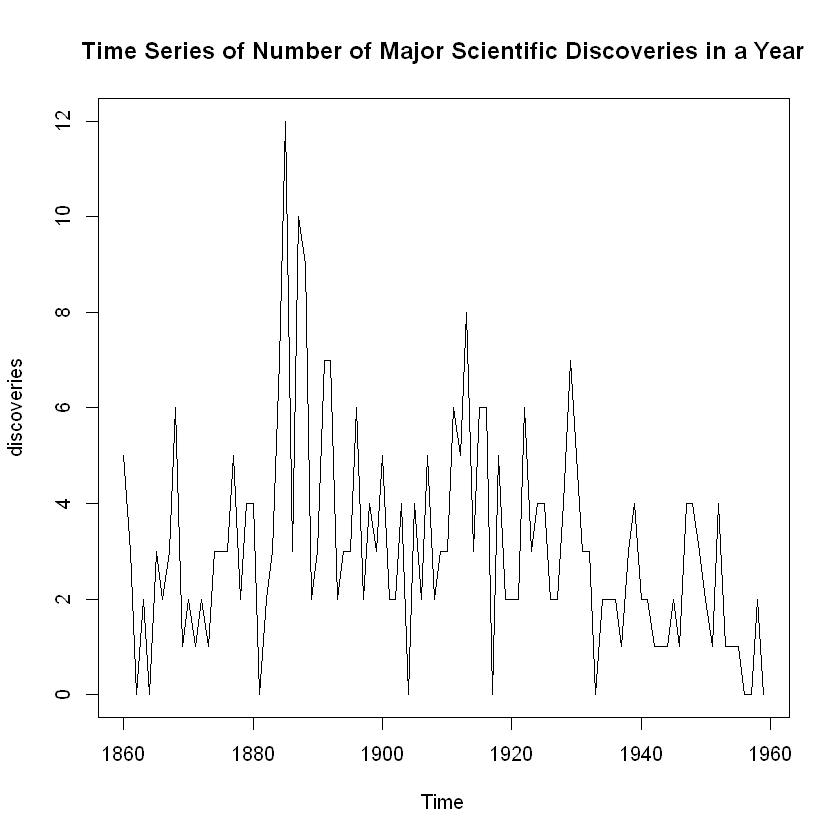

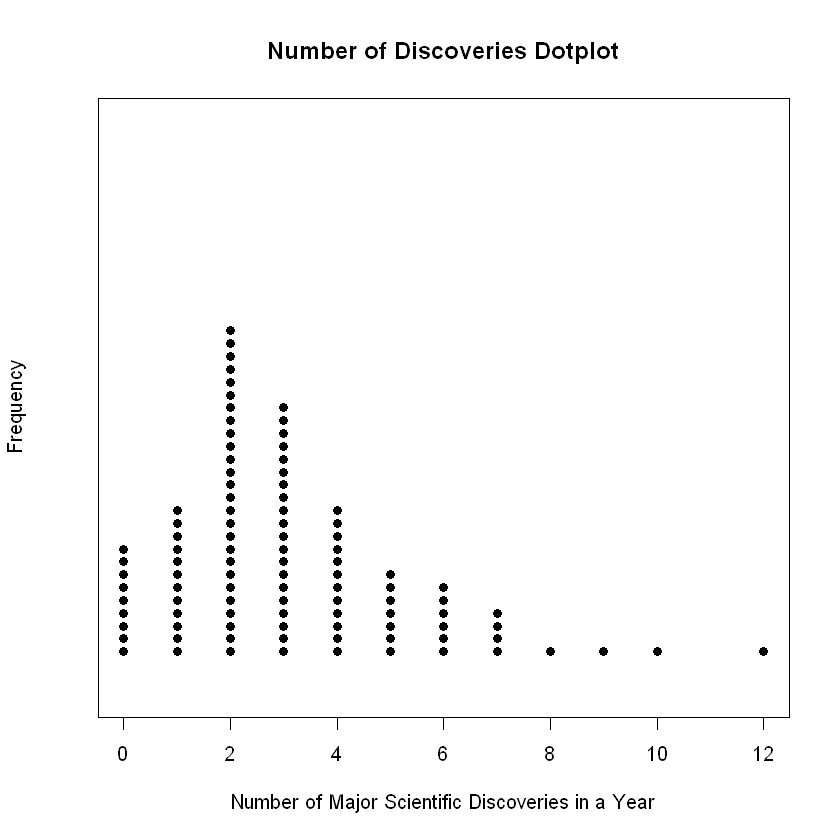

In [1]:
plot(discoveries, main='Time Series of Number of Major Scientific Discoveries in a Year')
stripchart(discoveries, method='stack', offset=.5, at=.15,pch=19, main="Number of Discoveries Dotplot", 
           xlab='Number of Major Scientific Discoveries in a Year',
          ylab='Frequency')

Model identification from ACF and PACF:

|      | AR(p)                | MA(q)                | ARMA(p,q) |
|------|----------------------|----------------------|-----------|
| ACF  | Tails off            | Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p | Tails off            | Tails off |

In practice howerver, things are not as trivial.

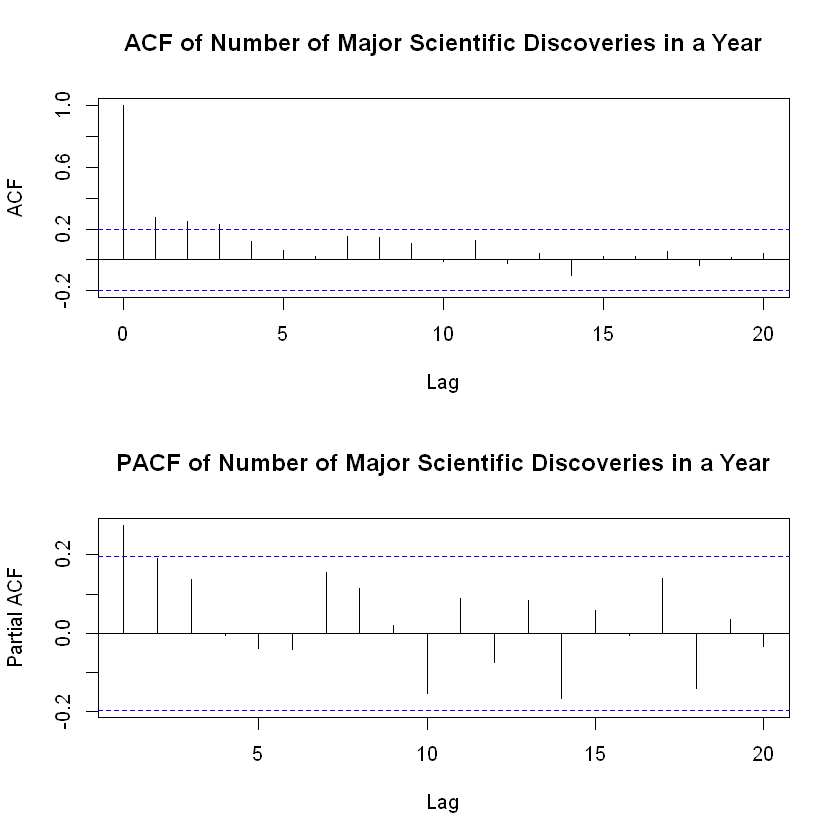

In [2]:
par(mfcol=c(2,1))
acf(discoveries, main="ACF of Number of Major Scientific Discoveries in a Year")
acf(discoveries, type="partial", main="PACF of Number of Major Scientific Discoveries in a Year")

Above ACF has three spikes barely above significance level and is hard to tell if it tails off or cuts off abruptly. The PACF seems to tail off.

It is a good idea in cases like these to try multiple models.

In [15]:
# MA order
q = c(0,1,2,3)
# AR order
p = c(0,1,2,3)

res = matrix(0, length(q)*length(p), 3)
id = 1
for (qq in q) {
    for (pp in p) {
        res[id,] = c(AIC(arima(discoveries, order=c(pp, 0, qq))), pp, qq)
        id = id + 1
    }
}
best_idx = which(res[,1] == min(res[,1]))
res[best_idx,]

[1] 439.9263   3.0000   2.0000

Above can be automated with `forecast` library:

In [17]:
library(forecast)
# d = 0 -- means that there are not evidence of trend
auto.arima(discoveries, d=0, approximation=F)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Series: discoveries 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8353  -0.6243  3.0208
s.e.  0.1379   0.1948  0.4728

sigma^2 estimated as 4.538:  log likelihood=-216.1
AIC=440.2   AICc=440.62   BIC=450.62